## TSF Data Science & Business Analysis Internship Task 1



### by Pushkar Khare

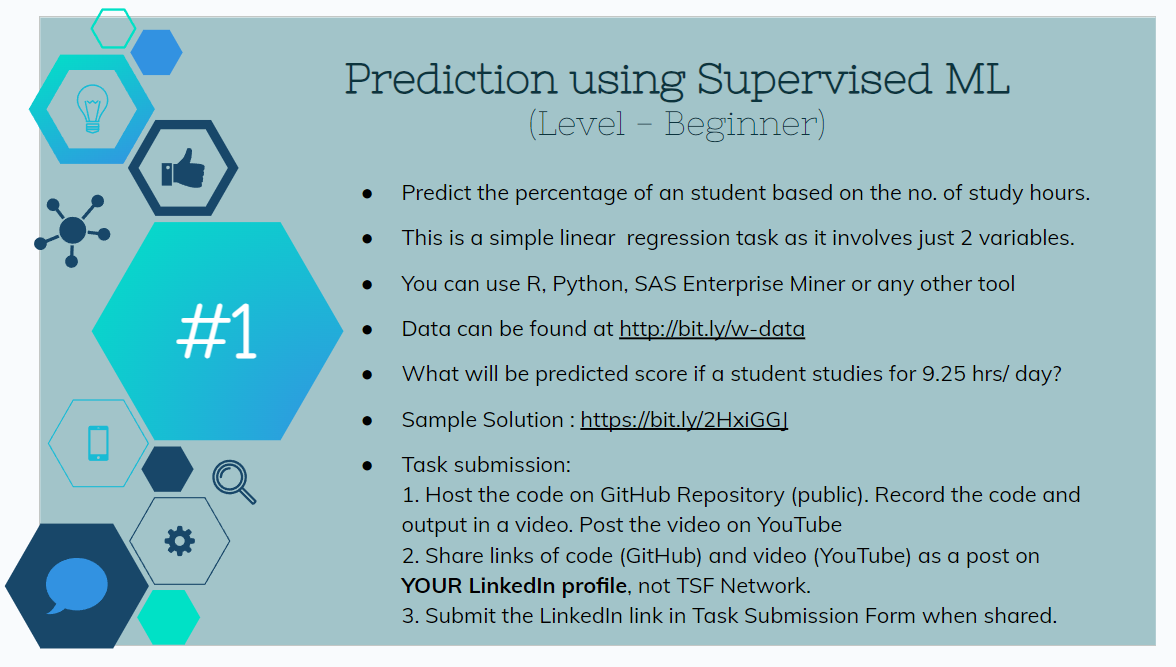

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
%matplotlib inline

In [4]:
df = pd.read_csv('student.csv')

In [5]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [6]:
df.shape

(25, 2)

In [7]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 532.0 bytes


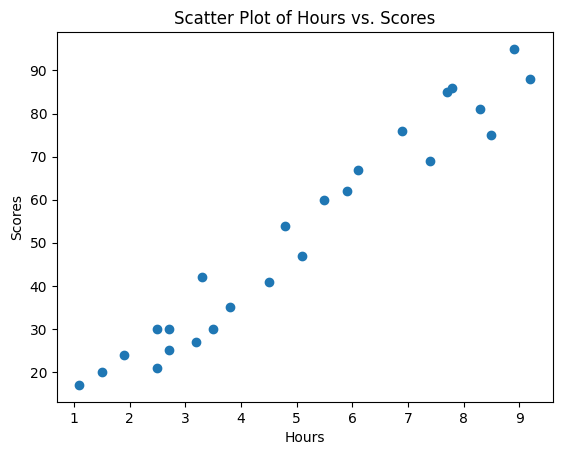

In [9]:
plt.scatter(df['Hours'], df['Scores'])
plt.title('Scatter Plot of Hours vs. Scores')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

There is a strong positive correlation between hours studied and scores achieved.This means that as the number of hours studied increases, the scores also tend to increase

In [10]:
X = df['Hours']
X.shape

(25,)

We need to reshape the X variable in this case because most machine learning algorithms expect the input data to be in a 2D array format. This is because machine learning algorithms typically operate on matrices, which are 2D arrays of numbers.

The X variable in here is a 1D array, which means that it has only one column. In order to use this data in a machine learning algorithm, we need to reshape it into a 2D array with one column

In [11]:
X = X.values.reshape(-1, 1)
X.shape

(25, 1)

In [12]:
y = df['Scores']

train test split

In [14]:
X_train , X_test , y_train , y_test = train_test_split(X,y , test_size = 0.20 , random_state = 52)

build model 

In [16]:
linear_model = LinearRegression()

In [17]:
linear_model.fit(X_train , y_train)

LinearRegression()

In [18]:
# prediction
predict = linear_model.predict(X_test)
predict

array([56.14408544, 29.01386742, 61.95770359, 13.51088568, 36.76535828])

In [19]:
# evaluate model 
mae = mean_absolute_error(y_test, predict)
mse = mean_squared_error(y_test, predict)
rmse = mean_squared_error(y_test, predict)
r2 = r2_score(y_test, predict)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared (R2) Score: {r2*100} %")

Mean Absolute Error: 4.633310194680215
Mean Squared Error: 22.869590622215586
Root Mean Squared Error: 22.869590622215586
R-squared (R2) Score: 94.23300619774673 %


MAE : MAE represents the average absolute difference between the predicted scores and the actual scores.Here, it's 4.63, which means, on average, model's predictions are about 4.63 points away from the actual scores.

MSE : MSE represents the average squared difference between the predicted scores and the actual scores.here, It's 22.87. MSE tends to penalize larger errors more than MAE.

RMSE: RMSE is the square root of MSE and is measured in the same units as the target variable.here, its 22.87 which gives an idea of how spread out the errors are.

R2 Score: the model is able to make accurate predictions of student scores with accuracy of 94.2%

In conclusion, 
model appears to perform well in predicting scores based on the given features m


#### L1 regularization (Lasso)

In [20]:
from sklearn.linear_model import Lasso

# Create and train the Lasso regression model with regularization strength (alpha)
lasso_model = Lasso(alpha=1.0)  # You can adjust the value of alpha
lasso_model.fit(X_train, y_train)


Lasso()

In [21]:
lasso_predictions = lasso_model.predict(X_test)


lasso_mae = mean_absolute_error(y_test, lasso_predictions)
lasso_mse = mean_squared_error(y_test, lasso_predictions)
lasso_rmse = mean_squared_error(y_test, lasso_predictions, squared=False)
lasso_r2 = r2_score(y_test, lasso_predictions)

print("Lasso (L1) Model Metrics:")
print(f"Mean Absolute Error (MAE): {lasso_mae}")
print(f"Mean Squared Error (MSE): {lasso_mse}")
print(f"Root Mean Squared Error (RMSE): {lasso_rmse}")
print(f"R-squared (R2) Score: {lasso_r2*100} %")

Lasso (L1) Model Metrics:
Mean Absolute Error (MAE): 4.670542391064273
Mean Squared Error (MSE): 23.815562774479517
Root Mean Squared Error (RMSE): 4.880119135275236
R-squared (R2) Score: 93.99446167680061 %


#### L2 regularization (Rigde)

In [22]:
from sklearn.linear_model import Ridge

In [23]:
ridge_model = Ridge(alpha=1.0)  # You can adjust the value of alpha
ridge_model.fit(X_train, y_train)

Ridge()

In [24]:
ridge_predictions = ridge_model.predict(X_test)

ridge_mae = mean_absolute_error(y_test, ridge_predictions)
ridge_mse = mean_squared_error(y_test, ridge_predictions)
ridge_rmse = mean_squared_error(y_test, ridge_predictions, squared=False)
ridge_r2 = r2_score(y_test, lasso_predictions)

print("Ridge (L2) Model Metrics:")
print(f"Mean Absolute Error (MAE): {ridge_mae}")
print(f"Mean Squared Error (MSE): {ridge_mse}")
print(f"Root Mean Squared Error (RMSE): {ridge_rmse}")
print(f"R-squared (R2) Score: {ridge_r2*100} %")

Ridge (L2) Model Metrics:
Mean Absolute Error (MAE): 4.651206837178726
Mean Squared Error (MSE): 23.28872632344344
Root Mean Squared Error (RMSE): 4.825839442360618
R-squared (R2) Score: 93.99446167680061 %


linear regression model is performing better than l1 and l2 model 

#### save model as pickel file

In [26]:
import pickle

with open("linear_model.pkl", "wb") as f:
    pickle.dump(linear_model, f)

the above code will save the linear_model object to a file named linear_model.pkl

#### load the model from the pickle file

In [27]:
# Load the model from a file
with open("linear_model.pkl", "rb") as f:
    linear_model = pickle.load(f)

Calculate Score of student who studies for 9.25 hours a day

In [29]:
prediction = linear_model.predict([[9.25]])

print(prediction)

[92.47919888]
